In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
import tensorflow as tf
import keras
import os
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import evaluation_metrics

import keras.backend as K

Using TensorFlow backend.


In [2]:
def get_data(path):
    
    with open(path + 'scores.p', 'rb') as f:
        scores = pickle.load(f)

    with open(path + 'opt_params.p', 'rb') as f:
        opt_params = pickle.load(f)

    with open(path + 'acc_drop.p', 'rb') as f:
        acc_drop = pickle.load(f)

    return scores, opt_params, acc_drop

In [3]:
global_save = 'C:/Users/320060820/OneDrive - Philips/Thesis docs/Thesis/Images/Final results/'
data_path = 'C:/Users/320060820/experiments/outputs/Comp_Dependent_Optimized_Search/'
models = ['DF MNIST', 'DF CIFAR10', 'DF Fashion', 'DF SVHN']

In [4]:
Results = collections.namedtuple('Results', 'scores, opt_params, acc_drop')

In [5]:
res = {}
for k in models:
    a, b, c = get_data(data_path + k + '/')
    kk = k.split(' ')[1]
    res[kk] = Results(scores = a, opt_params = b, acc_drop = c)

In [6]:
total_acc_drop = 0.005

In [19]:
layer_names = list(res['MNIST'].acc_drop['weights'].keys())
layer_names = ['C_{}'.format(x.split('_')[1]) if x.startswith('conv') else 'D_1' for x in layer_names ]

In [18]:
linear = lambda x, total_acc_drop, num_layers, offset=0: total_acc_drop/num_layers * x + offset

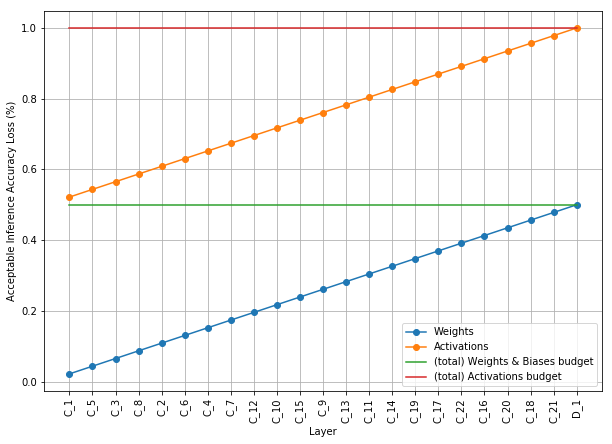

In [28]:
x = np.arange(1, len(layer_names) + 1)
plt.figure(figsize=(10, 7));
y1 = linear(x, total_acc_drop, len(layer_names)) * 100
y2 = linear(x, total_acc_drop, len(layer_names), total_acc_drop) * 100
plt.plot(x, y1, 'o-', label='Weights');
plt.plot(x, y2, 'o-', label='Activations');
plt.xticks(x, layer_names, rotation='vertical')
plt.plot(x, np.ones(y2.shape) * total_acc_drop * 100, label='(total) Weights & Biases budget');
plt.plot(x, np.ones(y2.shape) * total_acc_drop*2 * 100, label='(total) Activations budget')
plt.xlabel('Layer')
plt.ylabel('Acceptable Inference Accuracy Loss (%)')
plt.grid();
plt.legend();

### Weights

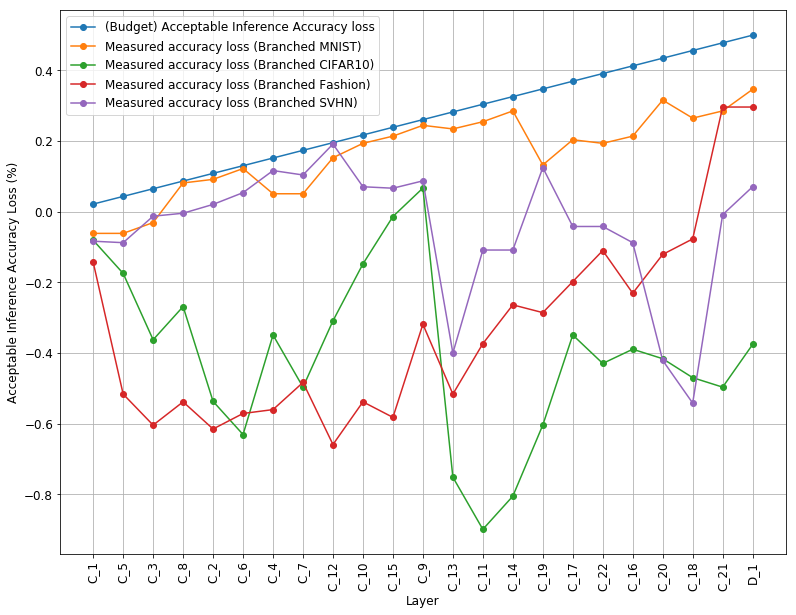

In [41]:
plt.rcParams.update({'font.size': 12, 'font.weight':520})
plt.figure(figsize=(13, 10))
plt.plot(x, y1, 'o-', label='(Budget) Acceptable Inference Accuracy loss');
for k in res:
    ad = list(res[k].acc_drop['weights'].values())
    ad = np.array(ad) * 100
    plt.plot(x, ad, 'o-', label=f'Measured accuracy loss (Branched {k})')
plt.grid();
plt.legend();
plt.xlabel('Layer')
plt.ylabel('Acceptable Inference Accuracy Loss (%)')
plt.xticks(x, layer_names, rotation='vertical');
plt.savefig(global_save + 'w_acc_loss_df.png', bbox_inches='tight')

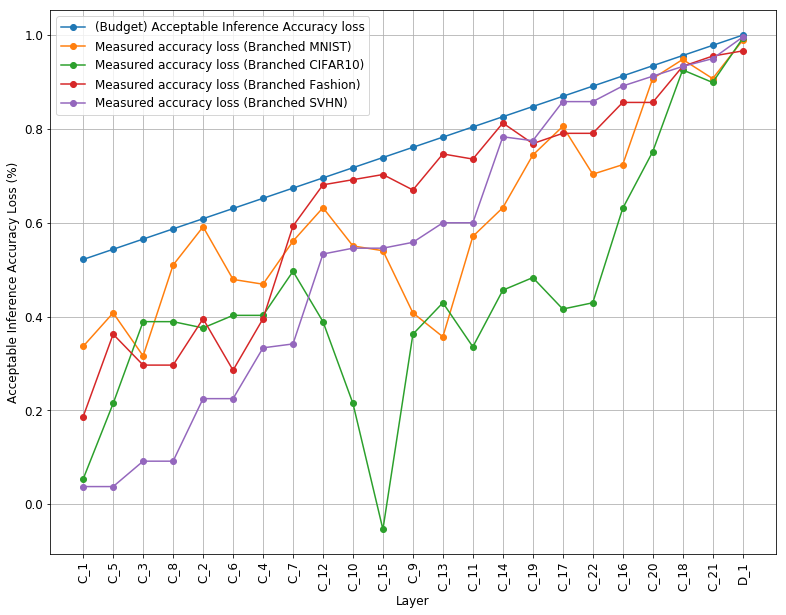

In [42]:
plt.rcParams.update({'font.size': 12, 'font.weight':520})
plt.figure(figsize=(13, 10))
plt.plot(x, y2, 'o-', label='(Budget) Acceptable Inference Accuracy loss');
for k in res:
    ad = list(res[k].acc_drop['activations'].values())
    ad = np.array(ad) * 100
    plt.plot(x, ad, 'o-', label=f'Measured accuracy loss (Branched {k})')
plt.grid();
plt.legend();
plt.xlabel('Layer')
plt.ylabel('Acceptable Inference Accuracy Loss (%)')
plt.xticks(x, layer_names, rotation='vertical');
plt.savefig(global_save + 'a_acc_loss_df.png', bbox_inches='tight')

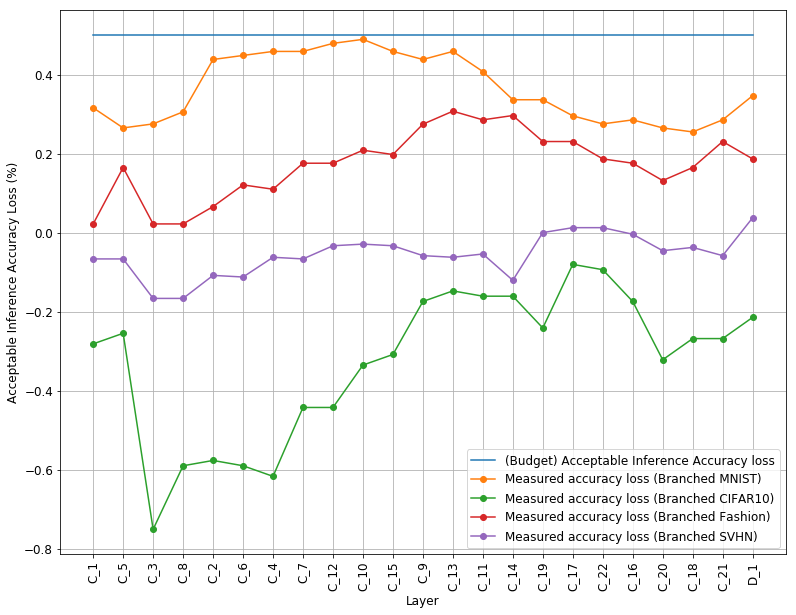

In [43]:
plt.rcParams.update({'font.size': 12, 'font.weight':520})
plt.figure(figsize=(13, 10))
plt.plot(x, np.ones(y2.shape) * total_acc_dsrop * 100, label='(Budget) Acceptable Inference Accuracy loss');
for k in res:
    ad = list(res[k].acc_drop['biases'].values())
    ad = np.array(ad) * 100
    plt.plot(x, ad, 'o-', label=f'Measured accuracy loss (Branched {k})')
plt.grid();
plt.legend();
plt.xlabel('Layer')
plt.ylabel('Acceptable Inference Accuracy Loss (%)')
plt.xticks(x, layer_names, rotation='vertical');
plt.savefig(global_save + 'b_acc_loss_df.png', bbox_inches='tight')

In [7]:
model_path = {'CIFAR10': 'C:/Users/320060820/experiments/test_models/cifar_df2/model_32_0.75.h5',
              'Fashion': 'C:/Users/320060820/experiments/test_models/fashion_df/fashion_df.h5',
              'MNIST': 'C:/Users/320060820/experiments/test_models/mnist_df/inception_v3_model_batchnorm.h5',
              'SVHN': 'C:/Users/320060820/experiments/test_models/svhn_df/svhn_df.h5'}

In [8]:
layer_names = list(res['MNIST'].acc_drop['weights'].keys())

In [9]:
memory_consumption = {}
for k in model_path:
    K.clear_session()
    model = keras.models.load_model(model_path[k])
    memory_consumption[k] = evaluation_metrics.evaluate_memory_consumption(model, layer_names, res[k].opt_params)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
memory_consumption

{'CIFAR10': {'weights': 95.49951171875,
  'biases': 0.122802734375,
  'activations': 182.825927734375},
 'Fashion': {'weights': 62.1259765625,
  'biases': 0.10986328125,
  'activations': 145.69970703125},
 'MNIST': {'weights': 53.99267578125,
  'biases': 0.118896484375,
  'activations': 152.164794921875},
 'SVHN': {'weights': 76.7158203125,
  'biases': 0.1005859375,
  'activations': 135.852294921875}}

In [ ]:
plt.figure(figsize=(10, 7))